In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import datetime 


In [3]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [5]:
path = '/Users/collinswestnedge/programming/Metis_Online/project_04/pickles/'

with open(path+'no_lemma_topic_model_big.pickle', 'rb') as file:
    reg_nmf = pickle.load(file)
    reg_doc_topic = pickle.load(file)
    reg_word_vec = pickle.load(file)
    reg_vectorizer = pickle.load(file)
    
    
with open(path+'lemma_topic_model_big.pickle', 'rb') as file:
    nmf_lemma = pickle.load(file)
    doc_topic_lemma = pickle.load(file)
    word_vec_lemma = pickle.load(file)
    vectorizer_lemma = pickle.load(file)
    

with open(path+'no_lemma_topic_model_big2.pickle', 'rb') as file:
    reg_nmf_large = pickle.load(file)
    reg_doc_topic_large = pickle.load(file)
    reg_word_vec_large = pickle.load(file)
    reg_vectorizer_large = pickle.load(file)
    

with open(path+'anxiety.pickle', 'rb') as file:
    anxiety_nmf = pickle.load(file)
    anxiety_doc_topic = pickle.load(file)
    anxiety_word_vec = pickle.load(file)
    anxiety_reg_vectorizer = pickle.load(file)

In [6]:
display_topics(anxiety_nmf, anxiety_reg_vectorizer.get_feature_names(), 100)



Topic  0
happen, mind, problem, hard, think, head, world, sure, normal, try, read, real, mean, remember, long, amp, kind, experience, hear, write, change, look, feel, moment, believe, brain, time, hope, cause, okay, weird, deal, stuff, pretty, guess, play, sense, come, matt, watch, situation, different, worry, constantly, struggle, idea, enjoy, probably, know, realize, sound, memory, place, game, control, question, share, voice, listen, make, fear, wonder, explain, video, etc, live, completely, act, usually, thank, family, face, want, forget, learn, get, body, see, negative, help, interest, give, big, recently, music, conversation, word, fact, say, suffer, away, sort, past, relate, post, dream, honestly, reality, inside, attention

Topic  1
not, will, mind, scare, stuff, parent, cause, worthless, head, problem, everytime, deserve, fuck, cut, alive, tho, bore, cant, annoy, bother, handle, motivation, okay, real, dumb, fix, matt, game, god, like, ask, pathetic, confuse, girl, tell, know

In [7]:
display_topics(nmf_lemma, vectorizer_lemma.get_feature_names(), 100)


Topic  0
happen, mind, problem, think, hard, head, normal, sure, world, try, have, read, real, remember, mean, kind, amp, long, hear, feel, write, experience, look, change, moment, deal, time, brain, believe, cause, weird, stuff, hope, okay, pretty, worry, come, guess, constantly, sense, play, idea, watch, situation, different, matt, probably, struggle, enjoy, know, sound, place, realize, memory, fear, make, control, game, voice, question, listen, share, explain, completely, wonder, etc, video, usually, act, family, live, recently, thank, forget, face, body, get, past, learn, negative, big, conversation, want, see, say, music, away, lately, word, sort, help, fact, give, dream, interest, relate, reality, post, suffer, notice

Topic  1
not, have, will, scare, mind, stuff, parent, suicidal, cause, problem, worthless, everytime, cut, tho, fuck, bore, deserve, head, hard, alive, cant, annoy, handle, motivation, bother, confuse, dumb, fix, god, okay, game, matt, real, attack, pathetic, like

In [8]:
general = reg_doc_topic[:,0]
advice_support = reg_doc_topic[:,1]
work = reg_doc_topic[:,2]
school = reg_doc_topic[:,3]
sleep = reg_doc_topic[:,5]
family = reg_doc_topic[:,6]
suicide = reg_doc_topic[:,7]
meds = reg_doc_topic_large[:,-2]
# idk = reg_doc_topic[:,4]
anxiety = anxiety_doc_topic[:,12]

emotion = doc_topic_lemma[:,9]
relationship = doc_topic_lemma[:,10]
eating_disorder = doc_topic_lemma[:,-1]
# anxiety = doc_topic_anxiety[:,-1]

In [19]:
df_full_clean = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_04/data/data_full_clean.csv', lineterminator='\n',low_memory=False)

In [26]:
df_full_clean['date'] = pd.to_datetime(df_full_clean['date'])

In [31]:
cols_of_interest = ['date', 'id', 'author', 'subreddit', 'title', 'selftext']
docs = df_full_clean[cols_of_interest + ['created_utc', 'text_title']].reset_index().drop(columns=['index', 'title'])

docs['professional_advice'] = general
docs['support']= advice_support
docs['work'] = work
docs['school'] = school
docs['sleep'] = sleep
docs['family'] = family
docs['suicide'] = suicide
docs['relationships'] = relationship
# docs['emotions'] = emotion
docs['meds'] = meds
docs['panic'] = anxiety
docs ['dietary_related'] = eating_disorder
# docs['anxiety'] = anxiety

docs['max_label'] = docs.select_dtypes(include=['float64']).idxmax(axis=1)
topic_doc_df = docs.copy()

In [32]:
testing = topic_doc_df.sort_values(by=['panic'], ascending=False)
testing.values[3]

array([Timestamp('2020-06-06 22:27:31'), 'gy52ia', 'gafsr',
       'mentalhealth',
       "I am unsure of what could be a panic attack and what isn't",
       1591500451,
       "What can be considered a panic attack? I am unsure of what could be a panic attack and what isn't",
       0.017837555271690456, 0.0, 0.0, 0.0, 0.0021494620193750163, 0.0,
       0.0, 0.0, 0.03088615212162872, 0.11898850458039598, 0.0, 'panic'],
      dtype=object)

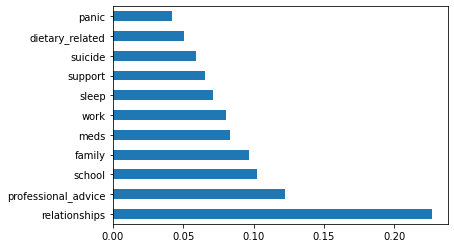

In [33]:
topic_doc_df.max_label.value_counts(normalize=True).plot(kind="barh");

In [35]:
topic_doc_df['hour'] = topic_doc_df.date.dt.hour
topic_doc_df['day'] = topic_doc_df.date.dt.day
topic_doc_df['month'] = topic_doc_df.date.dt.month
topic_doc_df['year'] = topic_doc_df.date.dt.year

pre_covid = topic_doc_df[topic_doc_df.date.dt.year == 2019]
post_covid = topic_doc_df[topic_doc_df.date.dt.year == 2020]

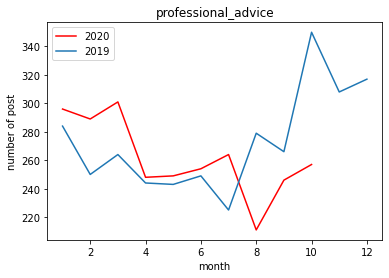

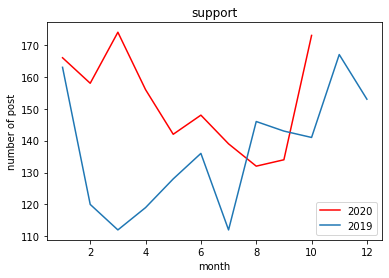

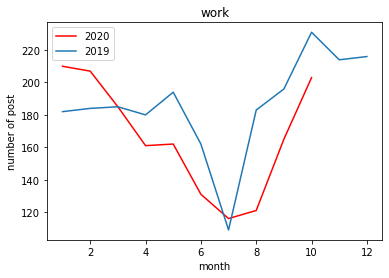

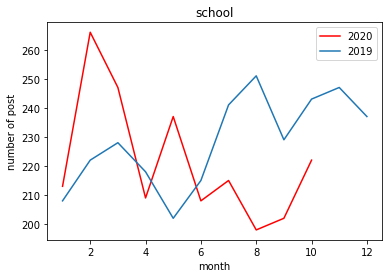

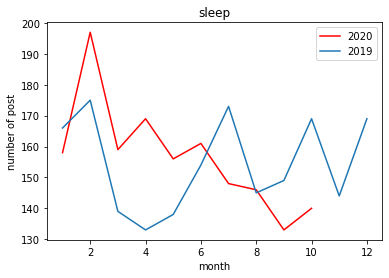

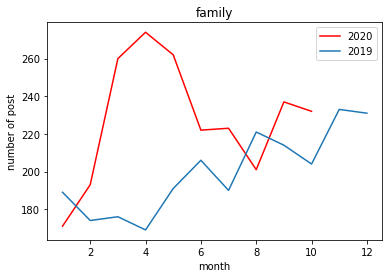

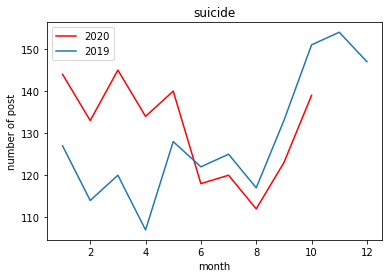

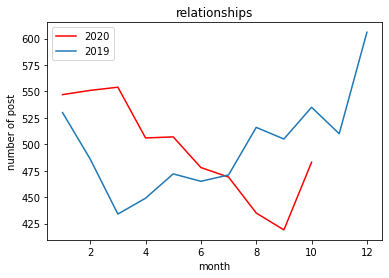

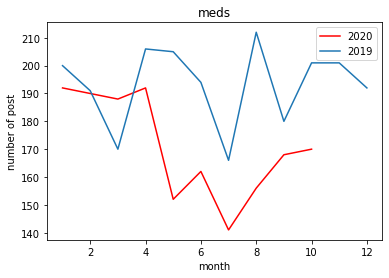

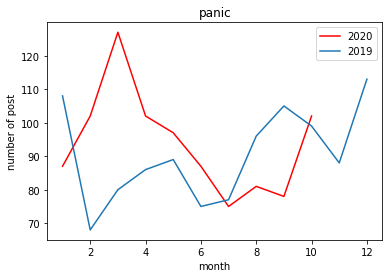

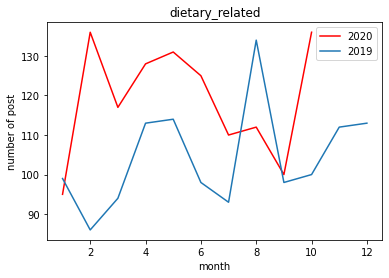

In [43]:
time_of_interest = 'month'

a = post_covid.groupby(time_of_interest).max_label.value_counts().to_frame()
b = pre_covid.groupby(time_of_interest).max_label.value_counts().to_frame()

a.columns = ['max_label_count']
b.columns = ['max_label_count']

temp_a = a.reset_index()
temp_b = b.reset_index()

for col in topic_doc_df.select_dtypes('float').columns.to_list():
    plt.title(col)
    x = temp_a[temp_a.max_label == col][time_of_interest]
    y = temp_a[temp_a.max_label == col].max_label_count
    plt.plot(x, y, color='r')
    
    x2 = temp_b[temp_b.max_label == col][time_of_interest]
    y2 = temp_b[temp_b.max_label == col].max_label_count
    plt.plot(x2, y2)
    plt.legend(['2020', '2019'])
    plt.xlabel(time_of_interest)
    plt.ylabel('number of post')
    plt.show()

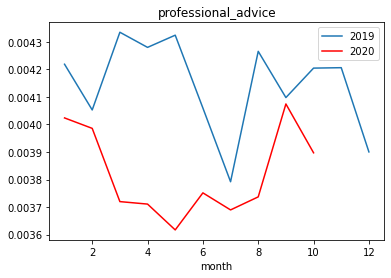

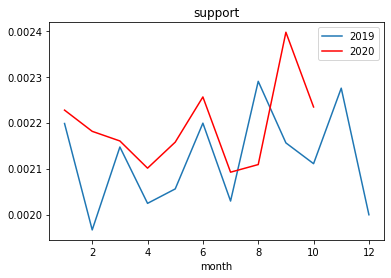

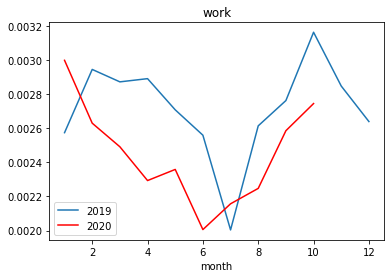

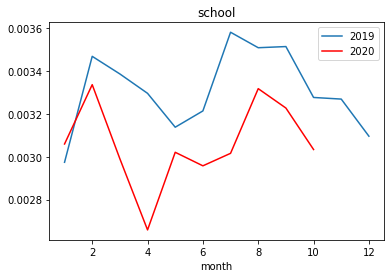

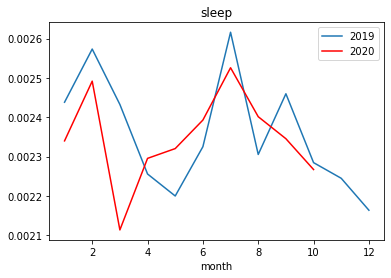

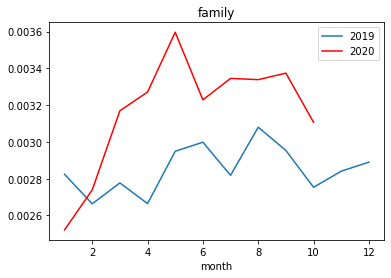

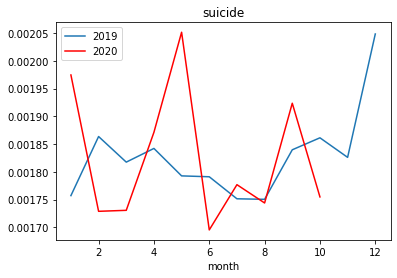

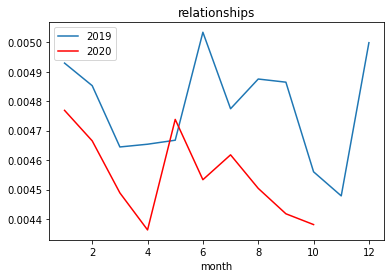

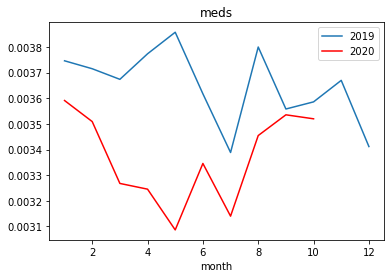

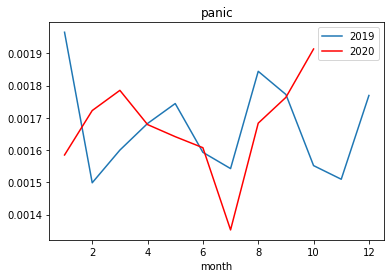

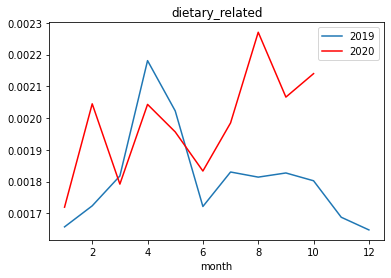

In [47]:
time_of_interest = 'month'
for col in topic_doc_df.select_dtypes('float').columns.to_list():
    plt.title(col)
    pre_covid.groupby(time_of_interest)[col].mean().plot()
    post_covid.groupby(time_of_interest)[col].mean().plot(color='r')
    plt.legend(['2019', '2020'])
    plt.show()

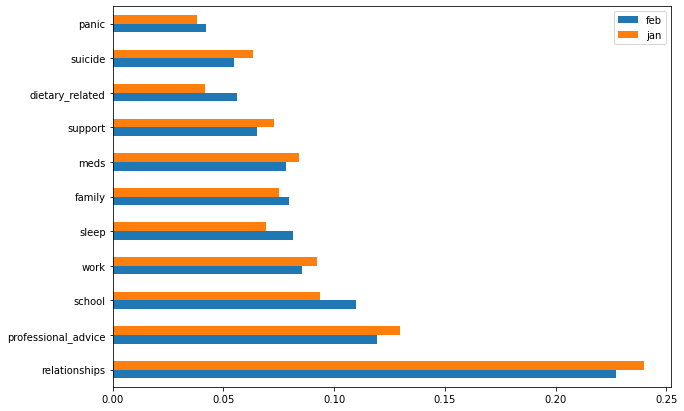

In [46]:
jan = topic_doc_df[(topic_doc_df.date.dt.month == 1) & (topic_doc_df.date.dt.year == 2020)]
feb = topic_doc_df[(topic_doc_df.date.dt.month == 2) & (topic_doc_df.date.dt.year == 2020)]

months = feb.max_label.value_counts(normalize=True).to_frame().merge(jan.max_label.value_counts(normalize=True).to_frame(), right_index=True, left_index=True)
months.columns = ['feb', 'jan']
months.plot.barh(figsize=(10,7));

# feb_means = feb.select_dtypes('float').mean().to_frame()
# jan_means = jan.select_dtypes('float').mean().to_frame()

# months = jan_means.merge(feb_means, right_index=True, left_index=True)
# months.columns = ['jan', 'feb']
# months.plot.barh(figsize=(10,7));

In [ ]:
import scattertext as st

category = 'relationships'
a = topic_doc_df[topic_doc_df.max_label == category].sample(1000)
b = topic_doc_df[topic_doc_df.max_label != category].sample(1000)

sample = pd.concat([a,b])

nlp = spacy.load("en_core_web_sm")
nlp.vocab[" "].is_stop = True
nlp.vocab["like"].is_stop = True
nlp.vocab["think"].is_stop = True
nlp.vocab["know"].is_stop = True
nlp.Defaults.stop_words |= set(stop_words)

corpus = st.CorpusFromPandas(sample,
                             category_col='max_label',
                             text_col='text_title',
                             nlp=nlp
                            ).build().remove_terms(set(stop_words), ignore_absences=True)

html = st.produce_scattertext_explorer(corpus,
          category=category,
          category_name=category,
          not_category_name='not '+ category,
          width_in_pixels=1000,
          minimum_term_frequency=10,
          pmi_threshold_coefficient=3,
          metadata=None)

open('scattertext_demo.html', 'wb').write(html.encode('utf-8'));

In [40]:
# # 	Tie-in to incorporate sckit-learn's various vectorizers into Scattertext
# from sklearn.datasets import fetch_20newsgroups
# from sklearn.feature_extraction.text import CountVectorizer
# from scattertext.CorpusFromScikit import CorpusFromScikit
# newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
# count_vectorizer = CountVectorizer()
# X_counts = count_vectorizer.fit_transform(newsgroups_train.data)

# corpus = CorpusFromScikit(
#                             X=reg_word_vec,
#                             y=test.values,
#                             feature_vocabulary=reg_vectorizer.vocabulary_,
#                             category_names=test2.values,
#                             raw_texts=topic_doc_df.selftext
#                              ).build()

# html = st.produce_scattertext_explorer(corpus,
#           category='anxiety',
#           category_name='anxiety',
#           not_category_name='not anxiety',
#           width_in_pixels=1000,
#           minimum_term_frequency=10,
#           pmi_threshold_coefficient=5,
#           metadata=None)